In [64]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

import keras

import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('train.csv')

In [29]:
labels=pd.read_csv('labels.csv')

In [30]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [31]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [32]:
df.shape

(3999, 42)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
ALP            3999 non-null float64
ALT            3999 non-null float64
AST            3999 non-null float64
Age            3999 non-null int64
Albumin        3999 non-null float64
BUN            3999 non-null float64
Bilirubin      3999 non-null float64
Cholesterol    3999 non-null float64
Creatinine     3999 non-null float64
DiasABP        3999 non-null float64
FiO2           3999 non-null float64
GCS            3999 non-null float64
Gender         3999 non-null int64
Glucose        3999 non-null float64
HCO3           3999 non-null float64
HCT            3999 non-null float64
HR             3999 non-null float64
Height         3999 non-null float64
ICUType        3999 non-null int64
K              3999 non-null float64
Lactate        3999 non-null float64
MAP            3999 non-null float64
MechVent       3999 non-null int64
Mg             3999 non-null float64
NIDiasABP    

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ALP,3999.0,89.259978,70.397850,12.000000,77.000000,77.000000,82.000000,1472.333333
ALT,3999.0,91.709903,427.290858,3.000000,31.000000,31.000000,32.250000,9143.428571
AST,3999.0,130.219258,590.482153,6.000000,46.000000,46.000000,49.000000,15680.000000
Age,3999.0,64.247562,17.563142,15.000000,52.500000,67.000000,78.000000,90.000000
Albumin,3999.0,2.975942,0.404440,1.100000,2.973333,2.973333,3.000000,5.300000
BUN,3999.0,25.449665,20.586576,2.250000,13.000000,19.000000,30.000000,170.833333
Bilirubin,3999.0,1.216527,2.961385,0.100000,0.700000,0.700000,0.700000,46.366667
Cholesterol,3999.0,152.403601,13.891279,0.000000,154.000000,154.000000,154.000000,330.000000
Creatinine,3999.0,1.363130,1.406947,0.200000,0.700000,0.933333,1.366667,16.457143
DiasABP,3999.0,59.262693,9.080069,0.000000,55.843712,58.795833,62.210006,106.666667


In [35]:
df['MechVent'].nunique()

1

In [36]:
labels.shape

(3999, 1)

In [37]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


In [38]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 1 columns):
In-hospital_death    3999 non-null int64
dtypes: int64(1)
memory usage: 31.4 KB


In [39]:
labels['In-hospital_death'].value_counts()
# 0 = no death, 1= death

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [40]:
#one-hot-encoding

ohe_data = pd.get_dummies(labels, columns = ['In-hospital_death'])
print(ohe_data)

      In-hospital_death_0  In-hospital_death_1
0                       1                    0
1                       1                    0
2                       1                    0
3                       1                    0
4                       1                    0
...                   ...                  ...
3994                    1                    0
3995                    1                    0
3996                    1                    0
3997                    0                    1
3998                    1                    0

[3999 rows x 2 columns]


In [41]:
print(ohe_data.shape)

(3999, 2)


In [42]:
#ohe_data.head()

In [43]:
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


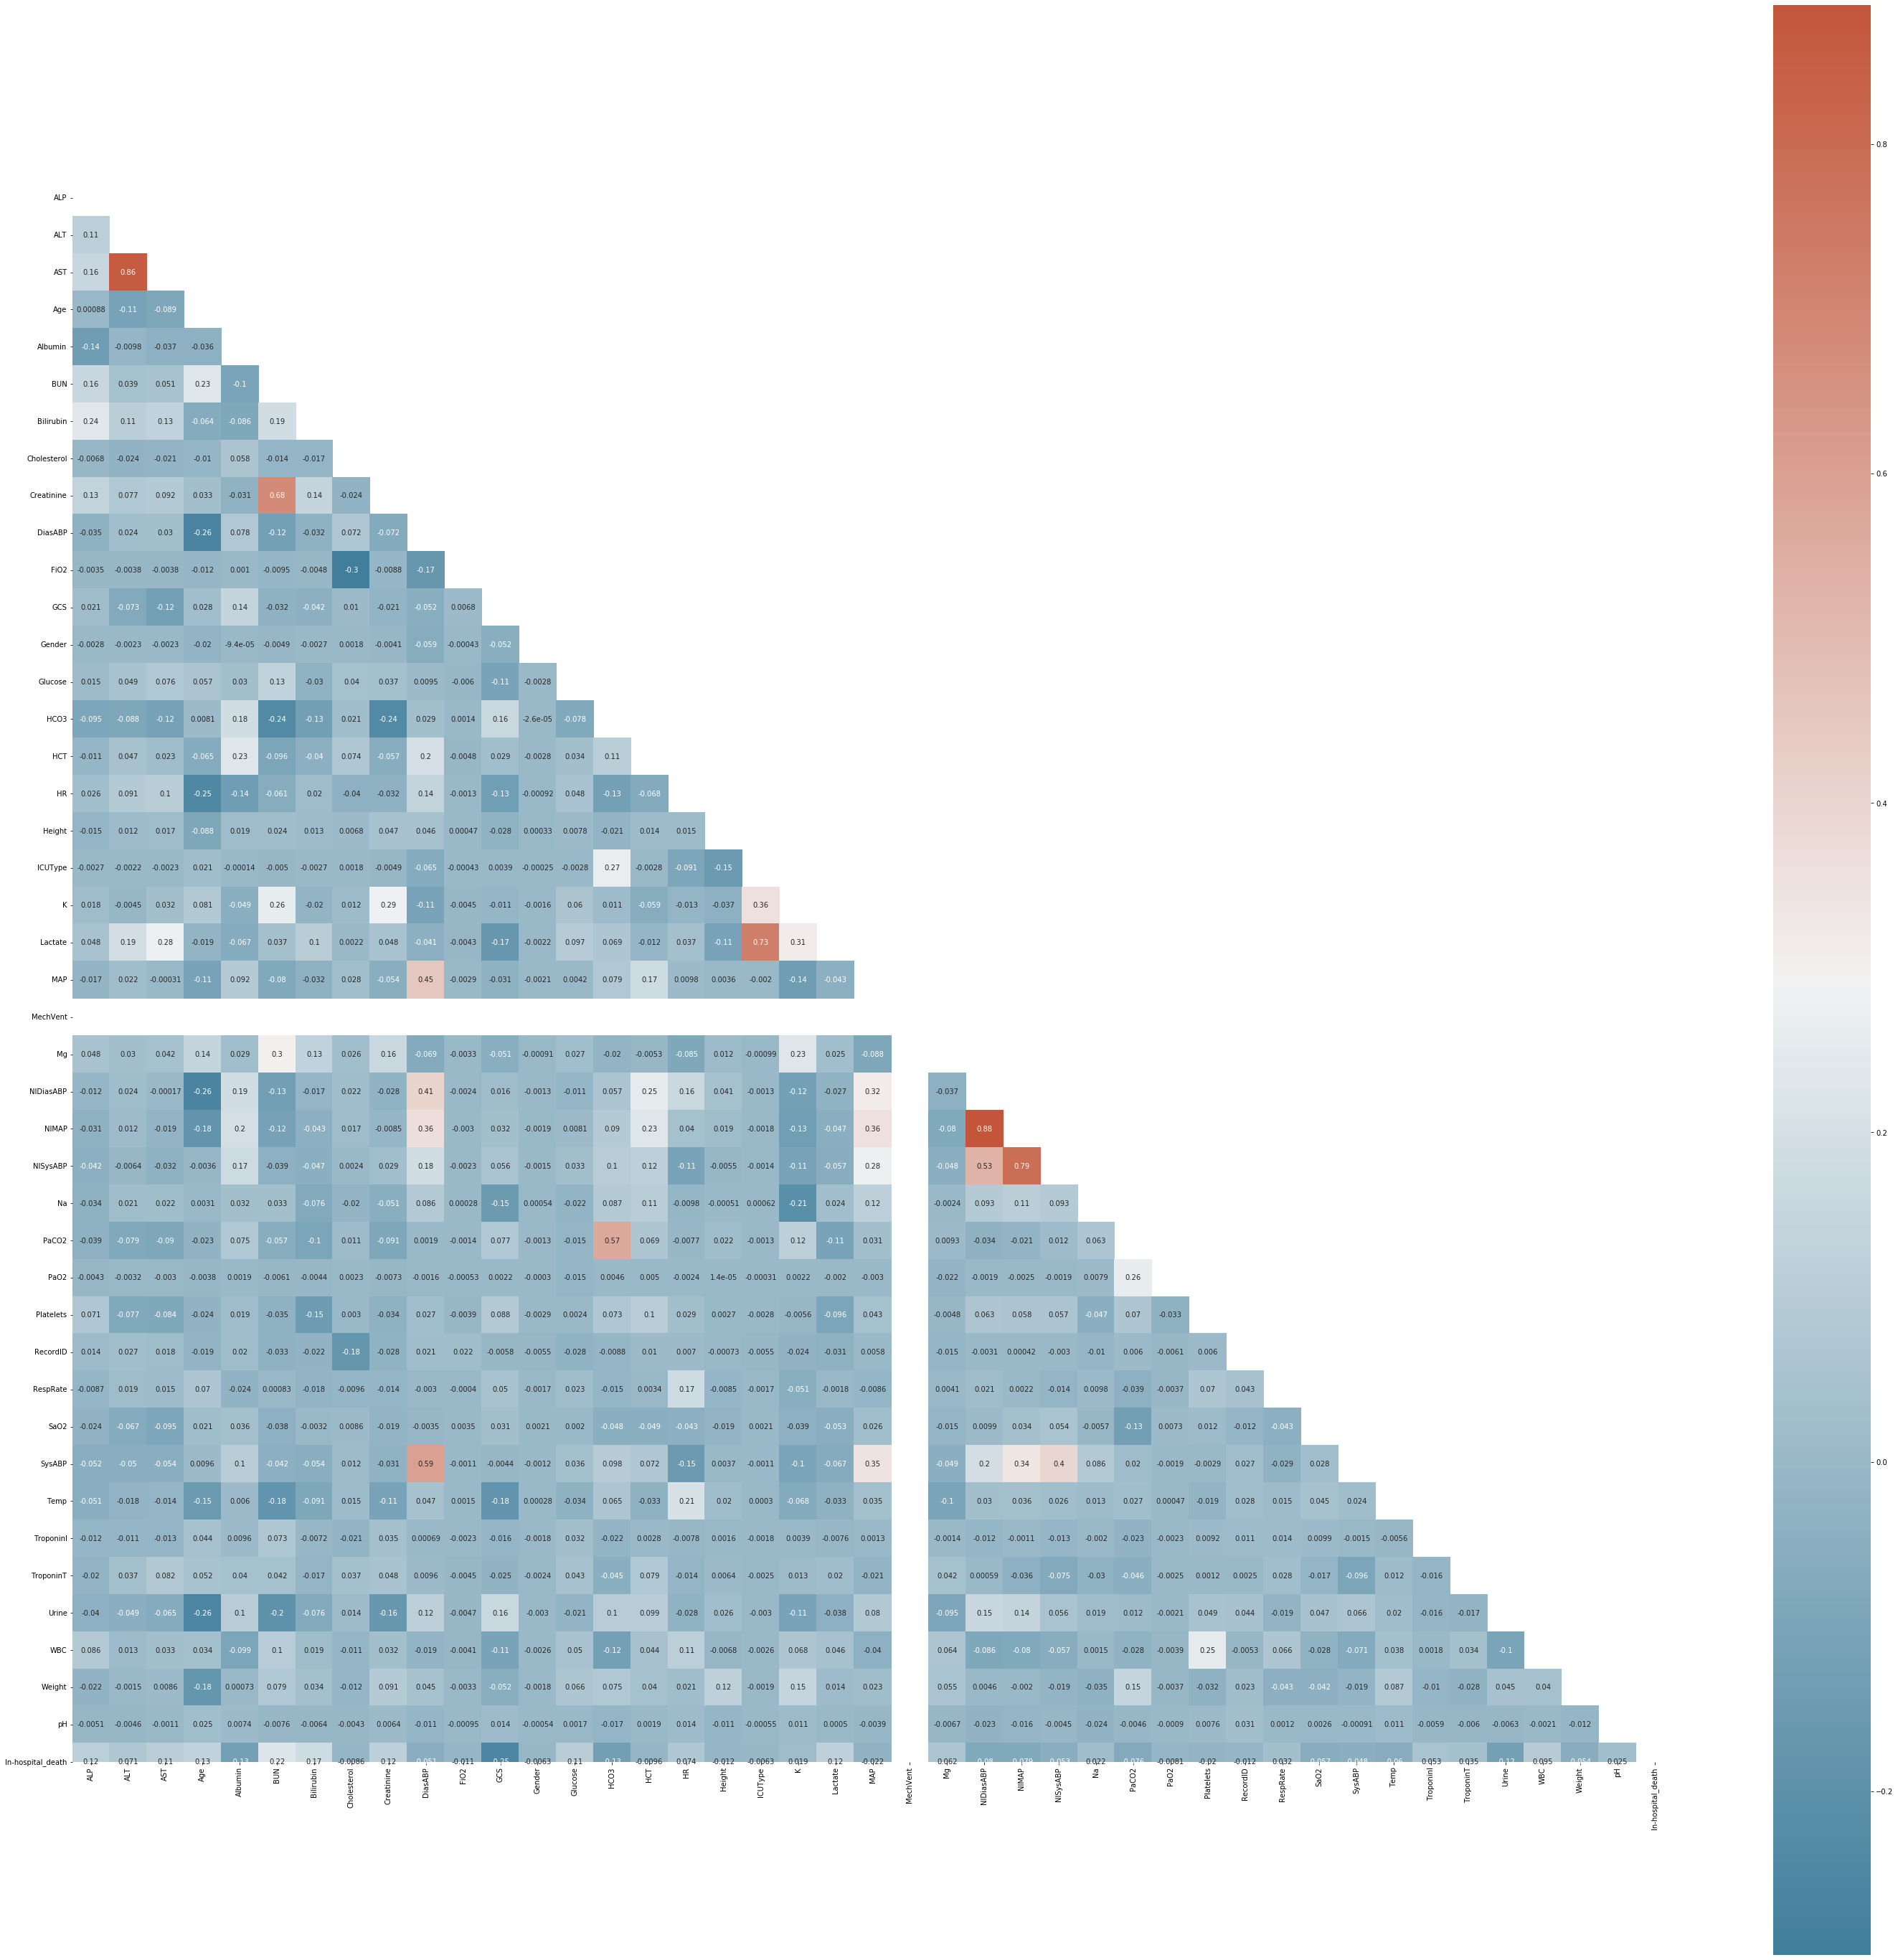

In [44]:
# using heat map to find correlation 
corr = new.corr()

# Getting the Upper Triangle of the co-relation matrix
mask = np.triu(corr)
plt.figure(figsize=(50,50))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(new.corr(), cmap= cmap, mask = mask, square = True, annot = True)
plt.show()

In [45]:
new_df = new.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

In [46]:
df = new_df

In [47]:
data=df.drop(['Gender', 'ICUType', 'RecordID','Height'], axis=1)

In [48]:
data.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Glucose',
       'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'MAP', 'MechVent', 'Mg',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'PaCO2', 'PaO2', 'Platelets',
       'RespRate', 'SaO2', 'SysABP', 'Temp', 'TroponinI', 'TroponinT', 'Urine',
       'WBC', 'Weight', 'pH'],
      dtype='object')


Dataframe df will be given as features parameter and Inhospitaldeath case will be given as target.

In [49]:
features = data

target = ohe_data

In [71]:
features.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [72]:
target.head()

,In-hospital_death_0,In-hospital_death_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [50]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the data

In [55]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [56]:
X_test_normalized=scaler.fit_transform(X_test)

In [75]:
print(type(X_train_normalized))

<class 'numpy.ndarray'>


#First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results everytime we run the code.

In [76]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

Let's build a feed forward neural network with 2 hidden layers and the output layer.

In [105]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(38,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of in-hospital_death  
model_1.add(Dense(2, activation='sigmoid'))

In [106]:
# Now we need to compile the model. Since this is binary classification, we can choose one optimizer out of 
# 1. SGD 2. RMSprop 3. Adam 4. Adadelta 5. Adagrad 6. Adamax 7. Nadam 8. Ftrl

# For now, let's try adamax optimizer with accuracy as the metric and see the model's summary.

model_1.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_1.summary()
#from keras.optimizers import Adam
#optimizer = Adam(lr=0.0005)
#model_1.compile(optimizer = optimizer,loss='binary_crossentropy', metrics=['accuracy'])
#print(model_1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               4992      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 13,378
Trainable params: 13,378
Non-trainable params: 0
_________________________________________________________________


In [107]:
print(X_train_normalized.shape)
print(y_train.shape)
print(type(X_train_normalized))
print(type(y_train.dtypes))

(3199, 38)
(3199, 2)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [108]:
new_y_train = y_train.to_numpy()
print(new_y_train.shape)
print(type(new_y_train))

(3199, 2)
<class 'numpy.ndarray'>


In [124]:
new_y_test = y_test.to_numpy()
print(new_y_test.shape)
print(type(new_y_test))

(800, 2)
<class 'numpy.ndarray'>


In [117]:
# let's train the model while keeping 10% data for validation.

history_1 = model_1.fit(X_train_normalized, 
                    new_y_train,
                    validation_split=0.1, 
                    epochs=60,
                    verbose=2)

Train on 2879 samples, validate on 320 samples
Epoch 1/60
2879/2879 - 0s - loss: 0.1772 - accuracy: 0.9311 - val_loss: 0.2942 - val_accuracy: 0.8719
Epoch 2/60
2879/2879 - 0s - loss: 0.1859 - accuracy: 0.9245 - val_loss: 0.2961 - val_accuracy: 0.8734
Epoch 3/60
2879/2879 - 0s - loss: 0.1847 - accuracy: 0.9250 - val_loss: 0.2889 - val_accuracy: 0.8687
Epoch 4/60
2879/2879 - 0s - loss: 0.1900 - accuracy: 0.9220 - val_loss: 0.2525 - val_accuracy: 0.9031
Epoch 5/60
2879/2879 - 0s - loss: 0.1840 - accuracy: 0.9283 - val_loss: 0.2682 - val_accuracy: 0.8781
Epoch 6/60
2879/2879 - 0s - loss: 0.1735 - accuracy: 0.9291 - val_loss: 0.2618 - val_accuracy: 0.8906
Epoch 7/60
2879/2879 - 0s - loss: 0.1760 - accuracy: 0.9326 - val_loss: 0.3022 - val_accuracy: 0.8781
Epoch 8/60
2879/2879 - 0s - loss: 0.1744 - accuracy: 0.9284 - val_loss: 0.2917 - val_accuracy: 0.8687
Epoch 9/60
2879/2879 - 0s - loss: 0.1781 - accuracy: 0.9241 - val_loss: 0.2916 - val_accuracy: 0.8781
Epoch 10/60
2879/2879 - 0s - loss: 

# Plotting Accuracy vs Epoch Curve

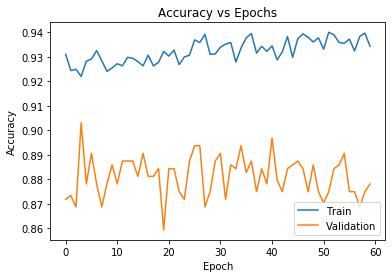

In [118]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

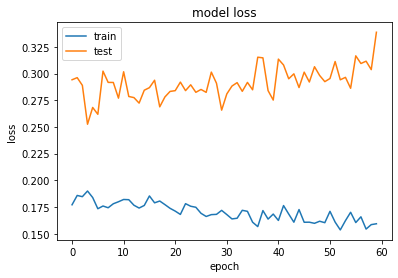

In [121]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [126]:
from sklearn.metrics import confusion_matrix
#prediction
pred = model_1.predict(X_test_normalized)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(new_y_test,axis = 1)

In [127]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[688   7]
 [ 89  16]]


In [128]:
print(accuracy_score(y_true,pred))

0.88


In [129]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [130]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [134]:
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(38,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(2, activation='sigmoid'))

In [136]:

model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               9984      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [139]:
history_3 = model_3.fit(X_train_normalized, 
                    new_y_train, 
                    validation_split=0.1, 
                    epochs=50,
                    verbose=2)

Train on 2879 samples, validate on 320 samples
Epoch 1/50
2879/2879 - 1s - loss: 0.3127 - accuracy: 0.8671 - val_loss: 0.2908 - val_accuracy: 0.8844
Epoch 2/50
2879/2879 - 1s - loss: 0.3088 - accuracy: 0.8772 - val_loss: 0.2949 - val_accuracy: 0.8672
Epoch 3/50
2879/2879 - 1s - loss: 0.3010 - accuracy: 0.8786 - val_loss: 0.2995 - val_accuracy: 0.8687
Epoch 4/50
2879/2879 - 1s - loss: 0.3038 - accuracy: 0.8741 - val_loss: 0.3057 - val_accuracy: 0.8672
Epoch 5/50
2879/2879 - 1s - loss: 0.3079 - accuracy: 0.8729 - val_loss: 0.2964 - val_accuracy: 0.8687
Epoch 6/50
2879/2879 - 1s - loss: 0.2996 - accuracy: 0.8760 - val_loss: 0.3015 - val_accuracy: 0.8750
Epoch 7/50
2879/2879 - 1s - loss: 0.3049 - accuracy: 0.8758 - val_loss: 0.3090 - val_accuracy: 0.8641
Epoch 8/50
2879/2879 - 1s - loss: 0.3016 - accuracy: 0.8784 - val_loss: 0.2890 - val_accuracy: 0.8719
Epoch 9/50
2879/2879 - 1s - loss: 0.2971 - accuracy: 0.8800 - val_loss: 0.2819 - val_accuracy: 0.8875
Epoch 10/50
2879/2879 - 1s - loss: 

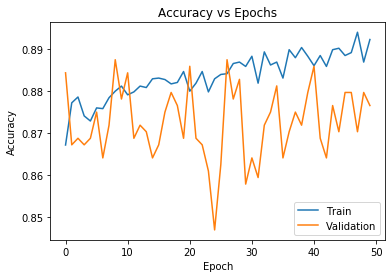

In [140]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [141]:
model_3.evaluate(X_test_normalized, new_y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test_normalized))

800/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [145]:
print(accuracy_score(y_true,pred))

0.88


In [ ]:
# Both of these models are giving ~88% accuracy with loss of ~27%. 